In [126]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [157]:
# Read in the data
train_data = pd.read_csv("./data/preprocessed_data/train.csv")

In [158]:
# Keeping the feature data for each day
day_data_cols = ['year', 'month', 'day', 'weekday', 'isHoliday', 'isWeekend', 'mean_temperature', 'total_precipitation']
day_data = train_data[day_data_cols].drop_duplicates(subset=day_data_cols, keep='first')

# Grouping the ride counts for each am and pm
train_new = train_data[['year', 'month', 'day', 'am_pm', 'rides_count']].groupby(['year', 'month', 'day', 'am_pm'], as_index=False)['rides_count'].sum()
train_new = train_new.merge(day_data, how='left', on=['year', 'month', 'day'])

train_new.head()

,year,month,day,am_pm,rides_count,weekday,isHoliday,isWeekend,mean_temperature,total_precipitation
0,2014,4,15,False,742,1,False,False,5.6,9.0
1,2014,4,15,True,835,1,False,False,5.6,9.0
2,2014,4,16,False,2462,2,False,False,-3.4,0.0
3,2014,4,16,True,718,2,False,False,-3.4,0.0
4,2014,4,17,False,4178,3,False,False,2.4,0.0


In [159]:
train_data["year"].value_counts().values[0]

352600

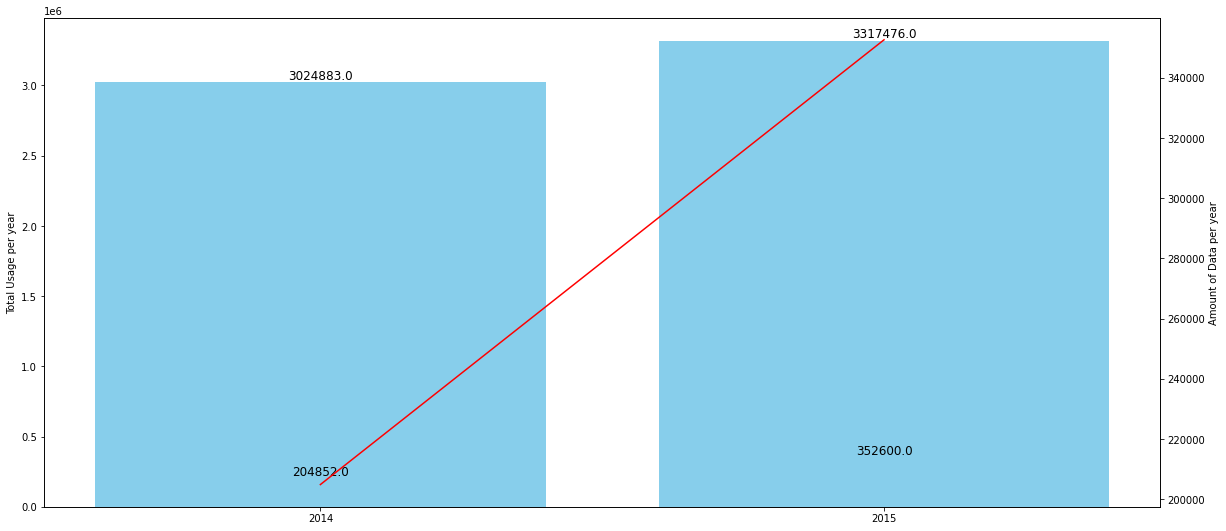

In [160]:

y = [train_data[train_data["year"]==2014]["rides_count"].sum(),  
     train_data[train_data["year"]==2015]["rides_count"].sum()]
x = ["2014","2015"]
y1 = [
      train_data["year"].value_counts().values[1],
      train_data["year"].value_counts().values[0]
      ]
plt.figure(figsize=(20,9))



for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 1.9, '%.1f' %height, ha='center', va='bottom', size = 12)
for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height  -0.9, '%.1f' %height, ha='center', va='bottom', size = 12)
    

plt.bar(x,y,color="skyblue")
plt.ylabel("Total Usage per year")
ax = plt.twinx()
plt.ylabel("Amount of Data per year")
ax.plot(x,y1,color="red")
plt.savefig('./data/resized_image_plot.png')


Public Bike System Company (PBSC) filed for bankruptcy at the beginning of 2014 as the company started experiencing financial difficulties in late 2013. The city of Montreal then bought PBSC's assets for $11.9 million in February 2014 and created BIXI Montréal, a non-profit entity to run the bike-sharing operations. The number of data (ride_count) in 2014 and 2015 has confirmed that the usage rate of bicycle rental increased by about 9.4% from 3024883 in 2014 to 3317476 in 2015. This result came as an output of the changes including the introduction of a $2.75 one-way fare and the return of the $5, 24-hour membership, leading to a 91-per-cent increase in occasional use over 2014. 





In [161]:
train_data["month"].value_counts().sort_index()

4      64433
5     139205
6     137038
7     142996
8     142924
9     137452
10    136124
Name: month, dtype: int64

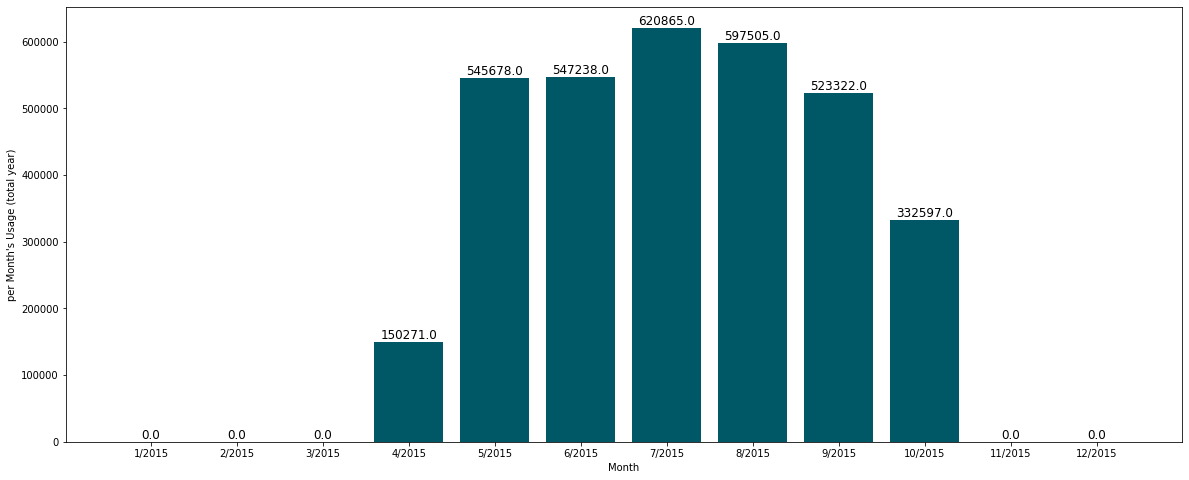

In [144]:
import matplotlib.pyplot as plt

# Filter the train_data dataset for the year 2015
train_data = train_data[train_data['year'] == 2015]

x = [f"{i}/2015" for i in range(1, 13)]
y = []
for i in range(1, 13):
    y.append(train_data[train_data["month"] == i]["rides_count"].sum())

plt.figure(figsize=(20, 8))
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 1.9, '%.1f' % height, ha='center', va='bottom', size=12)

plt.title("")
plt.xlabel("Month")
plt.ylabel("per Month's Usage (total year)")
plt.bar(x, y, color='#005766')
plt.show()

As in the previous seasonal demand analysis, when comparing monthly demand, it is confirmed that the amount of loans during the summer is the highest, and among them, 
the amount of loans during the period between spring and autumn is the highest.

In [171]:
train_data.head()

,latitude,longitude,distance_to_center,year,month,day,weekday,am_pm,isHoliday,isWeekend,mean_temperature,total_precipitation,stations_count,rides_count
0,45.523854,-73.519677,3.158849,2014,4,15,1,True,False,False,5.6,9.0,459,1
1,45.509310,-73.554431,0.051234,2014,4,15,1,True,False,False,5.6,9.0,459,2
2,45.511119,-73.567974,1.103429,2014,4,15,1,True,False,False,5.6,9.0,459,1
3,45.515330,-73.559148,0.814202,2014,4,15,1,True,False,False,5.6,9.0,459,4
4,45.514087,-73.552300,0.595784,2014,4,15,1,True,False,False,5.6,9.0,459,3


<Figure size 1440x576 with 0 Axes>

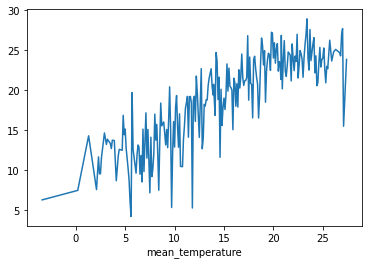

<Figure size 1440x576 with 0 Axes>

In [175]:
train_data.groupby('mean_temperature').mean()['rides_count'].plot.line()
plt.figure(figsize=(20, 8))

**Temperature vs Rented Bikes**